Link: https://www.kaggle.com/c/leaf-classification/data

Notes:
1. https://www.kaggle.com/felixsoul/basic-neural-network-using-tensorflow
2. https://www.kaggle.com/c/leaf-classification/notebooks
3. https://www.kaggle.com/natsu05/leaf-classification
4. https://www.kaggle.com/luikna/eda-and-tensorflow-implementation
5. https://www.kaggle.com/alexanderlazarev/simple-keras-1d-cnn-features-split
6. https://www.kaggle.com/sujit25/leaf-classification-using-neural-net-keras
7. https://www.kaggle.com/elusivedelusive/exploring-leafs
8. https://www.kaggle.com/mitchfrump/leaf-classification

To disable auto-scrolling for the output cell, run the following command.
link: https://github.com/minrk/ipython_extensions/blob/master/extensions/disable_autoscroll.py 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [81]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from torchvision import datasets, transforms
from PIL import ImageFile
from PIL import Image
from glob import glob
from tqdm import tqdm
import torch
import torchvision.models as models
from torch.autograd import Variable
import torchvision.transforms as transforms
import tensorflow.contrib.learn as learn

from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten, Input, merge
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils, to_categorical

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)
%matplotlib inline
ImageFile.LOAD_TRUNCATED_IMAGES = True

1.14.0


In [3]:
path = "D:/Kaggle/Leaf Classification/"
dataset = 'D:/Kaggle/Leaf Classification/images/'
new_dataset = 'D:/Kaggle/Leaf Classification/final/'
train_file = path + "train.csv"
test_file = path + "test.csv"

In [4]:
df = pd.read_csv(path + "train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [6]:
df.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,0.024209,0.011975,0.041252,0.008053,0.015609,0.000110,0.0151

In [7]:
df.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.000000,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000661,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.00000,0.000000,0.047852,0.000000,0.054688,0.022461,0.000000,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.000000,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.000000,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.000000,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,

In [8]:
df.tail()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
985,1575,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,0.042969,0.041016,0.003906,0.083984,0.000000,0.000000,0.000000,0.033203,0.019531,0.013672,0.019531,0.005859,0.001953,0.000000,0.000000,0.001953,0.009766,0.000000,0.001953,0.019531,0.003906,0.000000,0.000000,0.033203,0.0,0.023438,0.025391,0.017578,0.007812,0.000000,0.000000,0.000000,0.035156,0.013672,0.003906,0.001953,0.000000,0.000000,0.001953,0.000000,0.000000,0.060547,0.000000,0.015625,0.000000,0.000000,0.000000,0.019531,0.019531,0.017578,0.001953,0.000000,0.000000,0.039062,0.000000,0.000464,0.000398,0.000354,0.000344,0.000292,0.000255,0.000335,0.000420,0.000399,0.000347,0.000352,0.000320,0.000374,0.000371,0.000319,0.000397,0.000322,0.000357,0.000309,0.000340,0.000324,0.000353,0.000407,0.000341,0.000267,0.000221,0.000284,0.000367,0.000292,0.000372,0.000400,0.000492,0.000604,0.000505,0.000416,0.000361,0.000258,0.000212,0.000117,0.000171,0.000220,0.000295,0.000269,0.000325,0.000367,0.000434,0.000486,0.000565,0.000653,0.000552,0.000468,0.000408,0.000382,0.000312,0.000322,0.000223,0.000166,0.000092,0.000116,0.000200,0.000254,0.000330,0.000424,0.000535,0.020508,0.004883,0.012695,0.000000,0.040039,0.000000,0.006836,0.019531,0.022461,0.000000,0.000000,0.265630,0.000977,0.025391,0.000000,0.000000,0.002930,0.000977,0.004883,0.009766,0.000000,0.003906,0.000977,0.000000,0.000977,0.000000,0.000000,0.007812,0.008789,0.010742,0.003906,0.000000,0.000000,0.050781,0.012695,0.000000,0.000000,0.034180,0.000977,0.002930,0.000000,0.000000,0.000000,0.009766,0.011719,0.041992,0.002930,0.035156,0.005859,0.007812,0.000000,0.000000,0.000000,0.002930,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,1578,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,0.003906,0.023438,0.000000,0.017578,0.009766,0.000000,0.000000,0.001953,0.044922,0.019531,0.007812,0.003906,0.003906,0.000000,0.000000,0.003906,0.007812,0.000000,0.017578,0.087891,0.007812,0.003906,0.000000,0.017578,0.0,0.000000,0.015625,0.013672,0.013672,0.000000,0.000000,0.003906,0.062500,0.000000,0.000000,0.113280,0.000000,0.019531,0.000000,0.000000,0.011719,0.031250,0.000000,0.009766,0.000000,0.000000,0.000000,0.005859,0.097656,0.0996

In [9]:
print("Total Number of Species are: " + str(len(df['species'].unique())))
print("These Species include: " + str(df['species'].unique()))

Total Number of Species are: 99
These Species include: ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepi

In [10]:
species_arr = df['species'].unique()
species = {}
for index, row in df.iterrows():
    species[row['species']] = row['id']

In [13]:
def import_and_preprocess(img_path, image_name = 'default', save = False):
    img = cv2.imread(img_path)

    x = img.shape[1]
    y = img.shape[0]
    
    resize_x = 32
    resize_y = 32
    
    diff = int(np.floor(np.absolute(x-y)))

    pad = int(np.floor(diff/2))
    extra = int((diff % 2) + pad)
    
    if x > y:   
        img = cv2.copyMakeBorder(img, top=pad, bottom=extra, left=0, right=0, 
                                 borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])

    elif x < y:   
        img = cv2.copyMakeBorder(img, top=0, bottom=0, left=pad, right=extra, 
                                 borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0])

    img = cv2.resize(img, (resize_x, resize_y)) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, img) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    if save == True:
        #os.makedirs(new_dataset, exist_ok=True)
        #for label in df['species']:
            
        cv2.imwrite(new_dataset + str(image_name) + ".jpg", img)
    
    return img

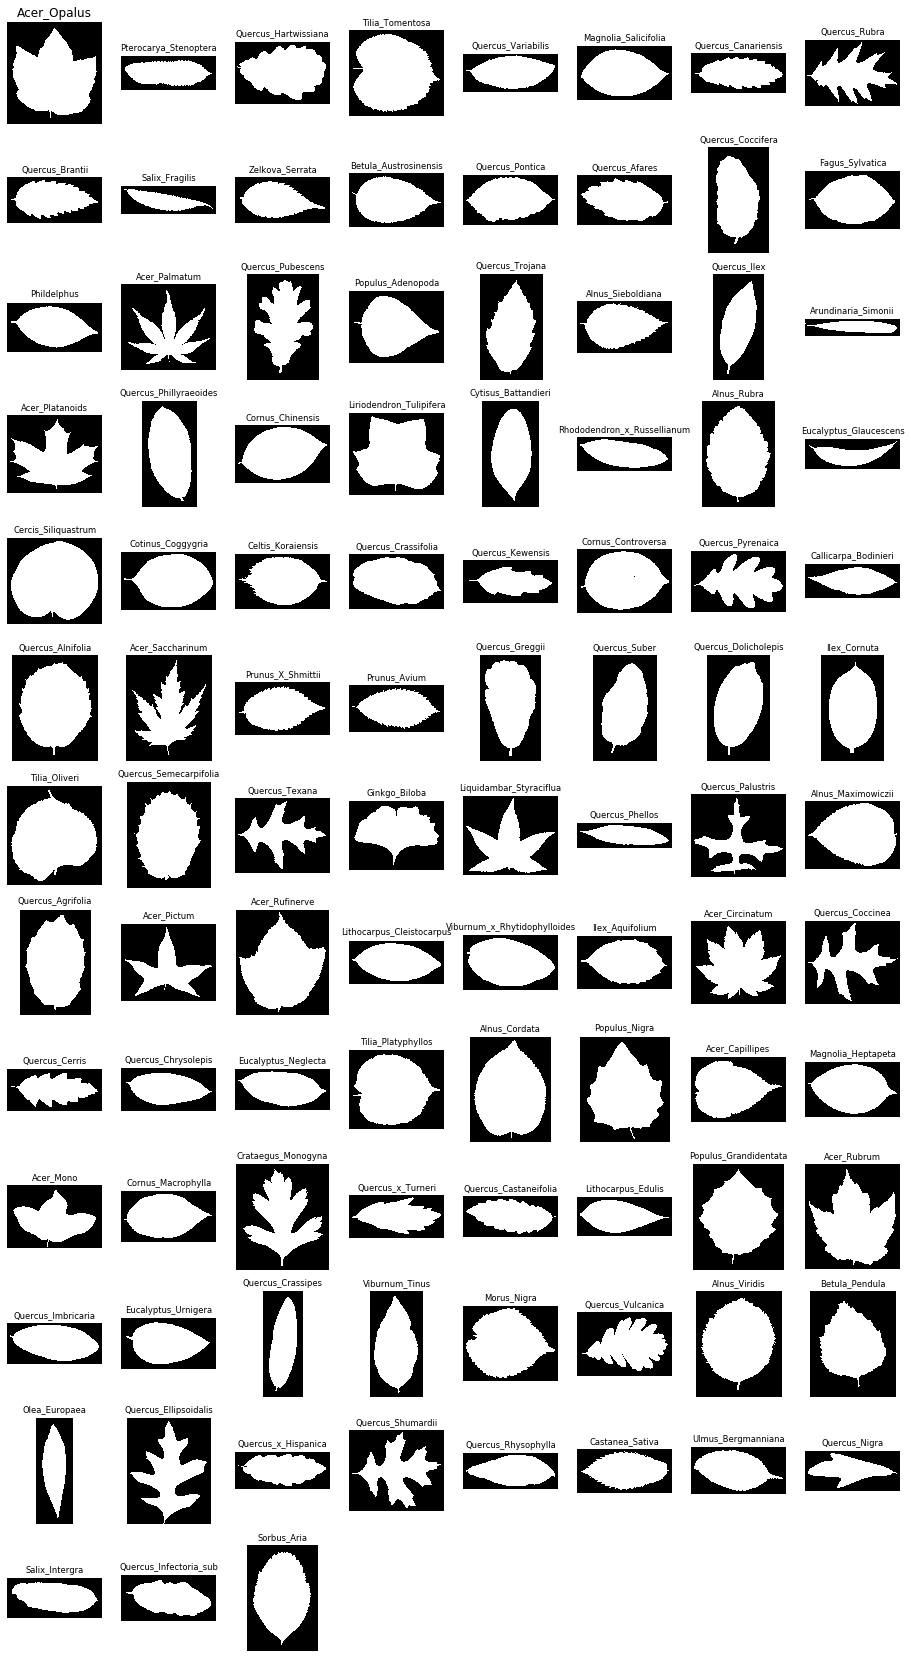

In [14]:
fig=plt.figure(figsize=(16, 30))
columns = 8
rows = 13
entry_number = 1
for key in species.keys():
    img_name = str(species[key])
    img_name = str(img_name)
    img_path = dataset + img_name + '.jpg'
    
    img = cv2.imread(img_path)
    
    a = fig.add_subplot(rows, columns, entry_number)
    entry_number = entry_number + 1
    a.set_title(str(key))
    plt.axis('off') # https://stackoverflow.com/a/9295472
    #plt.tight_layout() # https://stackoverflow.com/a/9827848
    plt.rcParams.update({'font.size': 7}) # https://stackoverflow.com/a/3900167
    plt.imshow(img)
plt.show()

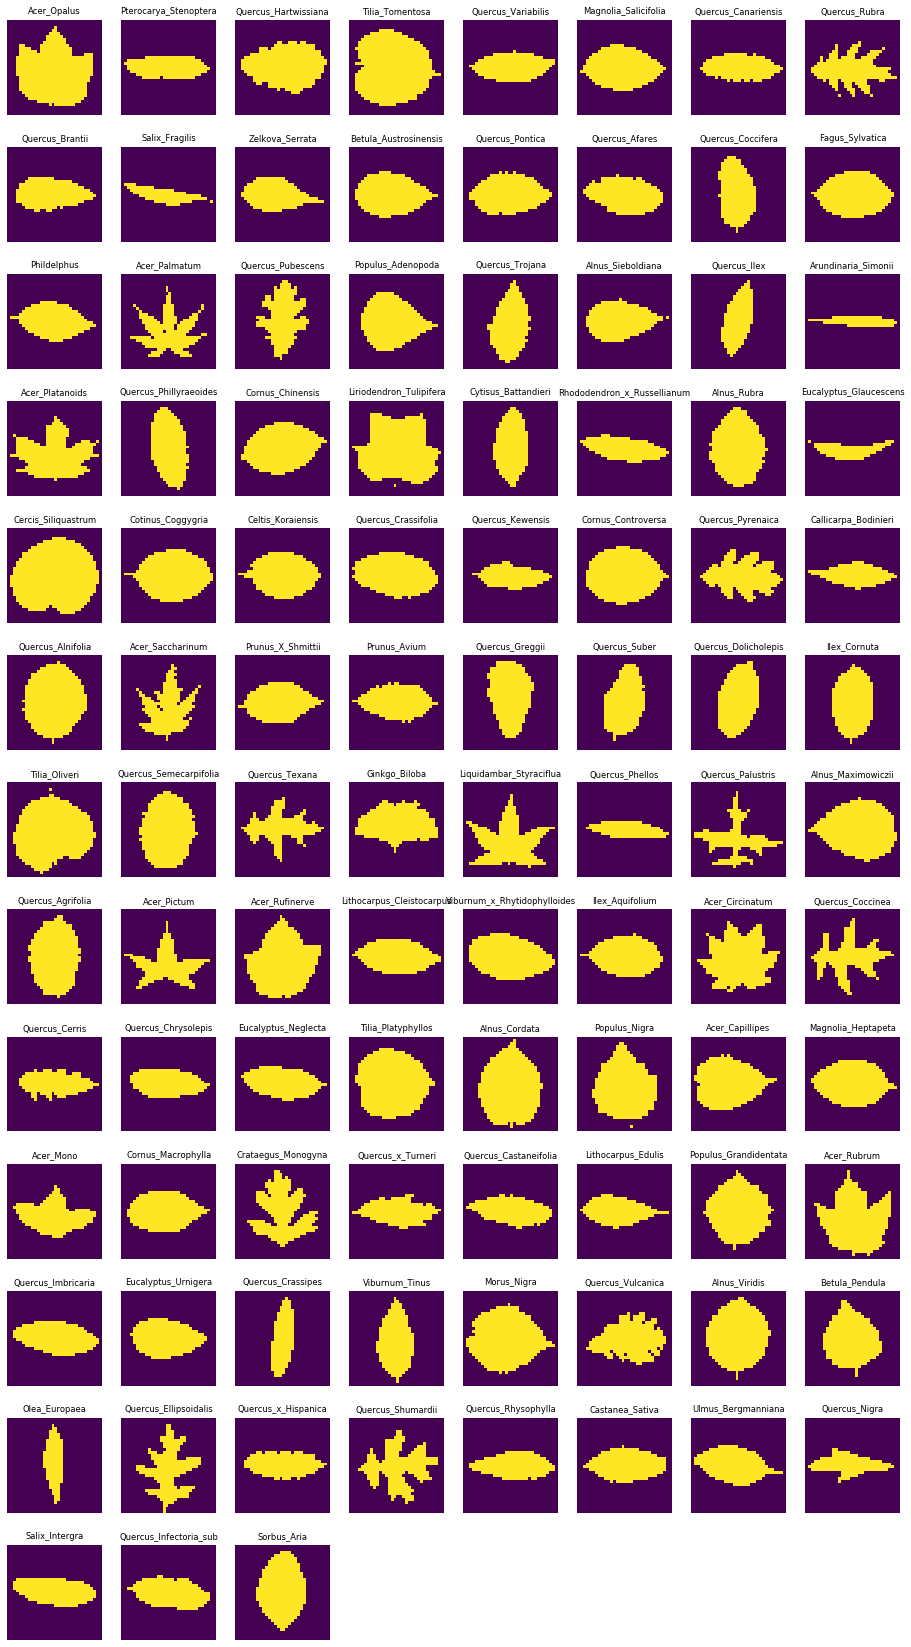

In [15]:
fig=plt.figure(figsize=(16, 30))
columns = 8
rows = 13
entry_number = 1
for key in species.keys():
    img_name = str(species[key])
    img_name = str(img_name)
    img_path = dataset + img_name + '.jpg'
    
    img = import_and_preprocess(img_path)
    
    a = fig.add_subplot(rows, columns, entry_number)
    entry_number = entry_number + 1
    a.set_title(str(key))
    plt.axis('off') # https://stackoverflow.com/a/9295472
    #plt.tight_layout() # https://stackoverflow.com/a/9827848
    plt.rcParams.update({'font.size': 7}) # https://stackoverflow.com/a/3900167
    plt.imshow(img)
plt.show()

Preprocessing the images and placing them in the destination directory.

In [15]:
for img_id in df['id']:
    img_path = dataset + str(img_id) + '.jpg'
    import_and_preprocess(img_path, str(img_id), True)

Organizing all the files in the destination directory and saving them in separate folders within the destination directory. There is a single folder for each class and there are a total of 99 classes, so there will be 99 folders created.

In [16]:
def organize_dataset(dest_dir):
    try:
        os.makedirs(dest_dir, exist_ok=True)
    except FileExistsError:
        # Note that exist_ok=True does not raise an exception if the directory already exists.
        print("Destination Directory Exists") 
        
    for row in df.values:
        img_name = row[0]
        img_species = row[1]
        
        source_path = dest_dir + "/" + str(img_name) + ".jpg"
        dest_path = dest_dir + '/' + str(img_species) + "/" + str(img_name) + ".jpg"
        
        try:
            os.makedirs(dest_dir + '/' + str(img_species), exist_ok=True)
        except FileExistsError:
            # Note that exist_ok=True does not raise an exception if the directory already exists.
            # You can remove this Try-Catch block as well. I've included it to give you options.
            print("Destination Folder Exists: " + str(img_species))
        
        os.replace(source_path, dest_path)
    
organize_dataset(new_dataset)

Manually checking

In [17]:
df[df["species"] == "Acer_Capillipes"]

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
111,201,Acer_Capillipes,0.001953,0.000000,0.017578,0.001953,0.054688,0.001953,0.019531,0.000000,0.009766,0.009766,0.000000,0.031250,0.000000,0.003906,0.041016,0.0,0.007812,0.000000,0.003906,0.005859,0.041016,0.023438,0.0,0.009766,0.011719,0.041016,0.007812,0.017578,0.000000,0.033203,0.033203,0.007812,0.011719,0.005859,0.001953,0.005859,0.003906,0.035156,0.041016,0.017578,0.015625,0.000000,0.011719,0.042969,0.000000,0.035156,0.048828,0.066406,0.011719,0.023438,0.005859,0.001953,0.046875,0.017578,0.046875,0.021484,0.009766,0.001953,0.009766,0.009766,0.000000,0.003906,0.007812,0.000000,0.000601,0.000625,0.000621,0.000630,0.000616,0.000586,0.000554,0.000535,0.000519,0.000510,0.000492,0.000474,0.000475,0.000466,0.000419,0.000429,0.000461,0.000461,0.000456,0.000509,0.000513,0.000562,0.000594,0.000628,0.000674,0.000709,0.000759,0.000822,0.000890,0.000961,0.001012,0.000939,0.000868,0.000803,0.000753,0.000707,0.000665,0.000624,0.000592,0.000564,0.000519,0.000516,0.000474,0.000454,0.000446,0.000430,0.000422,0.000449,0.000465,0.000477,0.000498,0.000503,0.000524,0.000542,0.000553,0.000568,0.000607,0.000636,0.000632,0.000637,0.000651,0.000631,0.000584,0.000642,0.005859,0.036133,0.021484,0.000000,0.048828,0.008789,0.009766,0.076172,0.041992,0.000977,0.000000,0.001953,0.015625,0.017578,0.0,0.001953,0.031250,0.000977,0.004883,0.040039,0.0,0.001953,0.037109,0.001953,0.001953,0.000000,0.005859,0.007812,0.057617,0.021484,0.040039,0.0,0.000000,0.036133,0.022461,0.0,0.0,0.023438,0.002930,0.003906,0.000000,0.003906,0.004883,0.035156,0.020508,0.065430,0.027344,0.028320,0.006836,0.050781,0.000000,0.000000,0.000000,0.004883,0.037109,0.0,0.011719,0.0,0.019531,0.0,0.0,0.000000,0.029297,0.025391
126,227,Acer_Capillipes,0.001953,0.000000,0.017578,0.013672,0.027344,0.000000,0.009766,0.000000,0.007812,0.013672,0.001953,0.019531,0.003906,0.005859,0.039062,0.0,0.011719,0.005859,0.005859,0.011719,0.046875,0.017578,0.0,0.011719,0.015625,0.027344,0.017578,0.021484,0.000000,0.021484,0.019531,0.029297,0.001953,0.000000,0.000000,0.001953,0.007812,0.048828,0.033203,0.023438,0.027344,0.009766,0.021484,0.037109,0.001953,0.029297,0.050781,0.072266,0.005859,0.015625,0.003906,0.000000,0.037109,0.021484,0.046875,0.023438,0.015625,0.001953,0.017578,0.003906,0.000000,0.001953,0.005859,0.005859,

One-hot encoding the labels files.

In [18]:
labels = df[['id', 'species']]
one_hot_encoded = pd.get_dummies(labels["species"])
labels = labels.join(one_hot_encoded)
labels = labels.drop('species',axis = 1)
labels = labels.drop('id',axis = 1)
labels.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
labels.tail()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
987,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 99 columns):
Acer_Capillipes                 990 non-null uint8
Acer_Circinatum                 990 non-null uint8
Acer_Mono                       990 non-null uint8
Acer_Opalus                     990 non-null uint8
Acer_Palmatum                   990 non-null uint8
Acer_Pictum                     990 non-null uint8
Acer_Platanoids                 990 non-null uint8
Acer_Rubrum                     990 non-null uint8
Acer_Rufinerve                  990 non-null uint8
Acer_Saccharinum                990 non-null uint8
Alnus_Cordata                   990 non-null uint8
Alnus_Maximowiczii              990 non-null uint8
Alnus_Rubra                     990 non-null uint8
Alnus_Sieboldiana               990 non-null uint8
Alnus_Viridis                   990 non-null uint8
Arundinaria_Simonii             990 non-null uint8
Betula_Austrosinensis           990 non-null uint8
Betula_Pendula              

In [21]:
labels.shape

(990, 99)

In [22]:
len(labels)

990

In [23]:
print(labels.values[79])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Final Model Training.

In [24]:
# create a data generator
datagen = ImageDataGenerator(
        rotation_range = 40,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.1,
        rescale = 32
        )

image_size = 32

train_data = datagen.flow_from_directory('D:/Kaggle/Leaf Classification/final/', target_size=(image_size, image_size), 
                                         class_mode='categorical', batch_size=64)

Found 990 images belonging to 99 classes.


In [25]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [30]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (image_size, image_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(99))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
#model.compile(loss='categorical_crossentropy',
#              optimizer=opt,
#              metrics=['accuracy'])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# Model's Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_14 (Activation)   (None, 15, 15, 64)        0         
__________

In [33]:
early_stopping = keras.callbacks.EarlyStopping(monitor='acc', mode='max', 
                                               verbose=1, patience=5, restore_best_weights = True)

history = keras.callbacks.History()

In [34]:
model_history = model.fit_generator(train_data, callbacks = [early_stopping, history], epochs=50, steps_per_epoch=16, validation_steps=8)

Epoch 1/50
16/16 [==============================] - ETA: 3s - loss: 16.1181 - acc: 0.0000e+ - ETA: 2s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.0551 - acc: 0.0039   - ETA: 1s - loss: 16.0677 - acc: 0.00 - ETA: 1s - loss: 16.0342 - acc: 0.00 - ETA: 1s - loss: 16.0461 - acc: 0.00 - ETA: 0s - loss: 16.0237 - acc: 0.00 - ETA: 0s - loss: 16.0342 - acc: 0.00 - ETA: 0s - loss: 16.0425 - acc: 0.00 - ETA: 0s - loss: 16.0265 - acc: 0.00 - ETA: 0s - loss: 16.0342 - acc: 0.00 - ETA: 0s - loss: 16.0019 - acc: 0.00 - ETA: 0s - loss: 15.9922 - acc: 0.00 - ETA: 0s - loss: 16.0006 - acc: 0.00 - 2s 107ms/step - loss: 16.0077 - acc: 0.0068
Epoch 2/50
16/16 [==============================] - ETA: 1s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.1181 - acc: 0.0000e+ - ETA: 1s - loss: 16.0994 - acc: 0.0000e+ - ETA: 1s - loss: 16.1025 - acc: 0.0000e+ - ETA: 0s - loss

In [35]:
print(history.history.keys())

dict_keys(['loss', 'acc'])


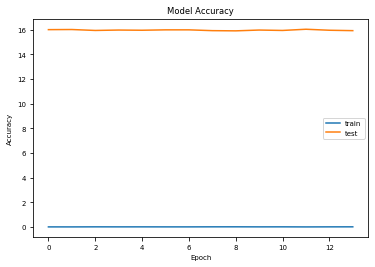

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='center right')
plt.show()

In [45]:
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000661,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.0

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [47]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,0.003906,0.001953,0.021484,0.025391,0.005859,0.001953,0.023438,0.068359,0.000000,0.011719,0.031250,0.001953,0.011719,0.003906,0.007812,0.000000,0.009766,0.003906,0.054688,0.000000,0.000000,0.000000,0.052734,0.000000,0.000782,0.000828,0.000876,0.000927,0.000993,0.001060,0.001123,0.001205,0.001295,0.001393,0.001496,0.001601,0.001679,0.001590,0.001492,0.001398,0.001314,0.001238,0.001186,0.001125,0.001070,0.001005,0.000943,0.000886,0.000826,0.000783,0.000741,0.000702,0.000671,0.000668,0.000682,0.000705,0.000736,0.000763,0.000805,0.000861,0.000918,0.000979,0.001054,0.001132,0.001212,0.001279,0.001364,0.001420,0.001435,0.001436,0.001418,0.001359,0.001284,0.001206,0.001134,0.001055,0.001003,0.000941,0.000879,0.000819,0.000762,0.000717,0.000698,0.000688,0.000680,0.000695,0.000719,0.000737,0.112310,0.013672,0.011719,0.004883,0.010742,0.022461,0.055664,0.028320,0.040039,0.008789,0.006836,0.00000,0.008789,0.008789,0.000000,0.0,0.017578,0.000977,0.025391,0.023438,0.0,0.000977,0.023438,0.000000,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,0.001953,0.009766,0.031250,0.001953,0.029297,0.007812,0.037109,0.009766,0.001953,0.058594,0.029297,0.001953,0.021484,0.003906,0.005859,0.000000,0.021484,0.015625,0.048828,0.000000,0.000000,0.007812,0.029297,0.013672,0.000534,0.000

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.8 KB


In [95]:
test_arr = test.drop(['id'], axis=1).values
test_arr.shape

(594, 192)

In [57]:
X_train = train.drop(['species', 'id'], axis=1).values
X_train

array([[0.007812, 0.023438, 0.023438, ..., 0.004883, 0.      , 0.025391],
       [0.005859, 0.      , 0.03125 , ..., 0.000977, 0.039062, 0.022461],
       [0.005859, 0.009766, 0.019531, ..., 0.      , 0.020508, 0.00293 ],
       ...,
       [0.001953, 0.003906, 0.      , ..., 0.027344, 0.      , 0.001953],
       [0.      , 0.      , 0.046875, ..., 0.      , 0.001953, 0.00293 ],
       [0.023438, 0.019531, 0.03125 , ..., 0.023438, 0.025391, 0.022461]])

In [68]:
scalar = preprocessing.StandardScaler().fit(X_train)
print(scalar.mean_)
print(scalar.scale_)

[0.01741236 0.02853929 0.03198784 0.02327962 0.01426367 0.03857921
 0.01920174 0.00108304 0.00716723 0.01863949 0.02420885 0.01197516
 0.04125242 0.00805311 0.01560917 0.00011048 0.01512781 0.02010729
 0.01234407 0.0131352  0.0191307  0.00619471 0.00099825 0.00764673
 0.00885411 0.01871843 0.00562849 0.0155342  0.0282611  0.01650088
 0.01084274 0.00969061 0.01950161 0.00108303 0.01316678 0.01804171
 0.01626813 0.03106059 0.01484568 0.0081636  0.01088417 0.01749522
 0.01885847 0.01267946 0.02468824 0.01005753 0.02531954 0.02700242
 0.00856017 0.01398157 0.02565692 0.00276391 0.02400172 0.01000232
 0.01819164 0.00595992 0.01255912 0.02019014 0.03095009 0.01185087
 0.00138881 0.00498337 0.02538862 0.00437374 0.00073932 0.00071827
 0.00069367 0.0006707  0.00064992 0.00063213 0.00061735 0.00060373
 0.00059028 0.0005782  0.00056927 0.00056173 0.00055579 0.00055102
 0.00054589 0.00054303 0.00054245 0.00054236 0.00054234 0.0005464
 0.00055405 0.00056331 0.00057479 0.00058562 0.00059878 0.00061

In [69]:
X_train = scaler.transform(X_train)                           
X_train

array([[-0.48661074, -0.13135701, -0.33095592, ..., -0.39487147,
        -0.65214311,  0.26239707],
       [-0.58560191, -0.73488047, -0.02856115, ..., -0.49497401,
         2.18166976,  0.13364087],
       [-0.58560191, -0.48340807, -0.48219201, ..., -0.52001246,
         0.83564129, -0.72463124],
       ...,
       [-0.78358426, -0.63430181, -1.23821765, ...,  0.1807566 ,
        -0.65214311, -0.76756462],
       [-0.88257543, -0.73488047,  0.5762671 , ..., -0.52001246,
        -0.51045972, -0.72463124],
       [ 0.30542003, -0.23196142, -0.02856115, ...,  0.08065405,
         1.18988604,  0.13364087]])

In [78]:
X_train_labels = train['species']
print(X_train_labels.shape)
X_train_labels.head()

(990,)


0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [82]:
# Credit: https://www.kaggle.com/sujit25/leaf-classification-using-neural-net-keras
labelEncoder = LabelEncoder()
X_train_label_list = list(X_train_labels)
transformed_X_train_label_list = labelEncoder.fit(X_train_label_list).transform(X_train_label_list)
train_labels_arr = to_categorical(transformed_X_train_label_list)
print(train_labels_arr.shape)

(990, 99)


In [83]:
x_train, x_val, y_train, y_val = train_test_split(X_train, train_labels_arr, test_size= 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(792, 192)
(792, 99)
(198, 192)
(198, 99)


In [85]:
model = keras.Sequential()

model.add(Dense(128, kernel_initializer="uniform", input_dim= 192, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(99, activation='softmax'))

In [86]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [88]:
model_history = model.fit(x=x_train,y=y_train, epochs=500, batch_size= 32, validation_data=(x_val, y_val), verbose=1)

Train on 792 samples, validate on 198 samples
Epoch 1/500
792/792 [==============================] - ETA: 11s - loss: 4.7193 - acc: 0.03 - ETA: 0s - loss: 4.4171 - acc: 0.0769 - 1s 855us/step - loss: 4.1594 - acc: 0.1351 - val_loss: 3.4233 - val_acc: 0.4495
Epoch 2/500
792/792 [==============================] - ETA: 0s - loss: 3.4728 - acc: 0.343 - ETA: 0s - loss: 3.1368 - acc: 0.512 - ETA: 0s - loss: 2.9697 - acc: 0.551 - 0s 176us/step - loss: 2.9450 - acc: 0.5593 - val_loss: 2.5868 - val_acc: 0.6970
Epoch 3/500
792/792 [==============================] - ETA: 0s - loss: 2.2232 - acc: 0.843 - ETA: 0s - loss: 2.2902 - acc: 0.773 - ETA: 0s - loss: 2.1640 - acc: 0.773 - 0s 193us/step - loss: 2.1112 - acc: 0.7904 - val_loss: 1.9669 - val_acc: 0.8434
Epoch 4/500
792/792 [==============================] - ETA: 0s - loss: 1.6764 - acc: 0.937 - ETA: 0s - loss: 1.6601 - acc: 0.901 - ETA: 0s - loss: 1.5877 - acc: 0.892 - 0s 183us/step - loss: 1.5671 - acc: 0.8927 - val_loss: 1.4949 - val_acc: 0.

Epoch 35/500
792/792 [==============================] - ETA: 0s - loss: 0.0302 - acc: 1.000 - ETA: 0s - loss: 0.0330 - acc: 1.000 - ETA: 0s - loss: 0.0324 - acc: 1.000 - 0s 224us/step - loss: 0.0324 - acc: 1.0000 - val_loss: 0.1097 - val_acc: 0.9848
Epoch 36/500
792/792 [==============================] - ETA: 0s - loss: 0.0339 - acc: 1.000 - ETA: 0s - loss: 0.0283 - acc: 1.000 - ETA: 0s - loss: 0.0300 - acc: 1.000 - 0s 161us/step - loss: 0.0301 - acc: 1.0000 - val_loss: 0.1086 - val_acc: 0.9848
Epoch 37/500
792/792 [==============================] - ETA: 0s - loss: 0.0243 - acc: 1.000 - ETA: 0s - loss: 0.0303 - acc: 1.000 - ETA: 0s - loss: 0.0288 - acc: 1.000 - 0s 171us/step - loss: 0.0290 - acc: 1.0000 - val_loss: 0.1046 - val_acc: 0.9848
Epoch 38/500
792/792 [==============================] - ETA: 0s - loss: 0.0263 - acc: 1.000 - ETA: 0s - loss: 0.0265 - acc: 1.000 - ETA: 0s - loss: 0.0269 - acc: 1.000 - 0s 190us/step - loss: 0.0259 - acc: 1.0000 - val_loss: 0.1031 - val_acc: 0.9848


792/792 [==============================] - ETA: 0s - loss: 0.0038 - acc: 1.000 - ETA: 0s - loss: 0.0041 - acc: 1.000 - ETA: 0s - loss: 0.0038 - acc: 1.000 - 0s 188us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9848
Epoch 102/500
792/792 [==============================] - ETA: 0s - loss: 0.0049 - acc: 1.000 - ETA: 0s - loss: 0.0044 - acc: 1.000 - 0s 143us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0642 - val_acc: 0.9848
Epoch 103/500
792/792 [==============================] - ETA: 0s - loss: 0.0038 - acc: 1.000 - ETA: 0s - loss: 0.0037 - acc: 1.000 - ETA: 0s - loss: 0.0036 - acc: 1.000 - 0s 191us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0644 - val_acc: 0.9848
Epoch 104/500
792/792 [==============================] - ETA: 0s - loss: 0.0036 - acc: 1.000 - ETA: 0s - loss: 0.0039 - acc: 1.000 - 0s 170us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.0629 - val_acc: 0.9848
Epoch 105/500
792/792 [==============================] - ETA: 0s - loss: 0.0032 - acc:

792/792 [==============================] - ETA: 0s - loss: 9.1297e-04 - acc: 1.000 - ETA: 0s - loss: 0.0012 - acc: 1.0000    - ETA: 0s - loss: 0.0012 - acc: 1.000 - ETA: 0s - loss: 0.0011 - acc: 1.000 - 0s 235us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0567 - val_acc: 0.9848
Epoch 169/500
792/792 [==============================] - ETA: 0s - loss: 0.0013 - acc: 1.000 - ETA: 0s - loss: 0.0011 - acc: 1.000 - ETA: 0s - loss: 0.0011 - acc: 1.000 - 0s 218us/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0559 - val_acc: 0.9848
Epoch 170/500
792/792 [==============================] - ETA: 0s - loss: 0.0011 - acc: 1.000 - ETA: 0s - loss: 0.0011 - acc: 1.000 - 0s 171us/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0559 - val_acc: 0.9848
Epoch 171/500
792/792 [==============================] - ETA: 0s - loss: 8.5519e-04 - acc: 1.000 - ETA: 0s - loss: 0.0011 - acc: 1.0000    - ETA: 0s - loss: 0.0012 - acc: 1.000 - 0s 194us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0555 - val_acc: 0

Epoch 201/500
792/792 [==============================] - ETA: 0s - loss: 6.8827e-04 - acc: 1.000 - ETA: 0s - loss: 7.9567e-04 - acc: 1.000 - 0s 150us/step - loss: 7.7542e-04 - acc: 1.0000 - val_loss: 0.0515 - val_acc: 0.9848
Epoch 202/500
792/792 [==============================] - ETA: 0s - loss: 7.1664e-04 - acc: 1.000 - ETA: 0s - loss: 7.7968e-04 - acc: 1.000 - 0s 146us/step - loss: 7.9095e-04 - acc: 1.0000 - val_loss: 0.0516 - val_acc: 0.9848
Epoch 203/500
792/792 [==============================] - ETA: 0s - loss: 6.7978e-04 - acc: 1.000 - ETA: 0s - loss: 6.7256e-04 - acc: 1.000 - 0s 146us/step - loss: 6.7404e-04 - acc: 1.0000 - val_loss: 0.0512 - val_acc: 0.9848
Epoch 204/500
792/792 [==============================] - ETA: 0s - loss: 5.8581e-04 - acc: 1.000 - ETA: 0s - loss: 7.7259e-04 - acc: 1.000 - ETA: 0s - loss: 7.2105e-04 - acc: 1.000 - 0s 170us/step - loss: 7.2188e-04 - acc: 1.0000 - val_loss: 0.0507 - val_acc: 0.9848
Epoch 205/500
792/792 [==============================] - E

Epoch 266/500
792/792 [==============================] - ETA: 0s - loss: 3.7313e-04 - acc: 1.000 - ETA: 0s - loss: 2.8101e-04 - acc: 1.000 - 0s 190us/step - loss: 3.1853e-04 - acc: 1.0000 - val_loss: 0.0503 - val_acc: 0.9848
Epoch 267/500
792/792 [==============================] - ETA: 0s - loss: 1.9019e-04 - acc: 1.000 - ETA: 0s - loss: 3.1072e-04 - acc: 1.000 - 0s 158us/step - loss: 2.7924e-04 - acc: 1.0000 - val_loss: 0.0500 - val_acc: 0.9848
Epoch 268/500
792/792 [==============================] - ETA: 0s - loss: 3.1493e-04 - acc: 1.000 - ETA: 0s - loss: 2.9196e-04 - acc: 1.000 - ETA: 0s - loss: 2.7568e-04 - acc: 1.000 - 0s 155us/step - loss: 2.7662e-04 - acc: 1.0000 - val_loss: 0.0497 - val_acc: 0.9848
Epoch 269/500
792/792 [==============================] - ETA: 0s - loss: 2.7659e-04 - acc: 1.000 - ETA: 0s - loss: 3.0667e-04 - acc: 1.000 - ETA: 0s - loss: 2.9980e-04 - acc: 1.000 - 0s 193us/step - loss: 3.1847e-04 - acc: 1.0000 - val_loss: 0.0501 - val_acc: 0.9848
Epoch 270/500
79

Epoch 296/500
792/792 [==============================] - ETA: 0s - loss: 2.2203e-04 - acc: 1.000 - ETA: 0s - loss: 1.9852e-04 - acc: 1.000 - ETA: 0s - loss: 1.8612e-04 - acc: 1.000 - ETA: 0s - loss: 1.8501e-04 - acc: 1.000 - 0s 297us/step - loss: 1.7980e-04 - acc: 1.0000 - val_loss: 0.0486 - val_acc: 0.9848
Epoch 297/500
792/792 [==============================] - ETA: 0s - loss: 1.6515e-04 - acc: 1.000 - ETA: 0s - loss: 1.8062e-04 - acc: 1.000 - ETA: 0s - loss: 1.6429e-04 - acc: 1.000 - 0s 189us/step - loss: 1.6614e-04 - acc: 1.0000 - val_loss: 0.0492 - val_acc: 0.9848
Epoch 298/500
792/792 [==============================] - ETA: 0s - loss: 8.4663e-04 - acc: 1.000 - ETA: 0s - loss: 3.0501e-04 - acc: 1.000 - ETA: 0s - loss: 2.2887e-04 - acc: 1.000 - 0s 207us/step - loss: 2.0945e-04 - acc: 1.0000 - val_loss: 0.0495 - val_acc: 0.9848
Epoch 299/500
792/792 [==============================] - ETA: 0s - loss: 1.3301e-04 - acc: 1.000 - ETA: 0s - loss: 1.9089e-04 - acc: 1.000 - ETA: 0s - loss: 

792/792 [==============================] - ETA: 0s - loss: 1.4129e-04 - acc: 1.000 - ETA: 0s - loss: 8.0813e-05 - acc: 1.000 - ETA: 0s - loss: 8.7611e-05 - acc: 1.000 - 0s 173us/step - loss: 8.6237e-05 - acc: 1.0000 - val_loss: 0.0487 - val_acc: 0.9848
Epoch 357/500
792/792 [==============================] - ETA: 0s - loss: 8.7217e-05 - acc: 1.000 - ETA: 0s - loss: 7.0439e-05 - acc: 1.000 - 0s 136us/step - loss: 7.8933e-05 - acc: 1.0000 - val_loss: 0.0480 - val_acc: 0.9899
Epoch 358/500
792/792 [==============================] - ETA: 0s - loss: 3.3088e-04 - acc: 1.000 - ETA: 0s - loss: 8.7540e-05 - acc: 1.000 - 0s 160us/step - loss: 9.1063e-05 - acc: 1.0000 - val_loss: 0.0479 - val_acc: 0.9899
Epoch 359/500
792/792 [==============================] - ETA: 0s - loss: 8.7959e-05 - acc: 1.000 - ETA: 0s - loss: 8.7329e-05 - acc: 1.000 - 0s 140us/step - loss: 9.6301e-05 - acc: 1.0000 - val_loss: 0.0485 - val_acc: 0.9899
Epoch 360/500
792/792 [==============================] - ETA: 0s - loss:

Epoch 390/500
792/792 [==============================] - ETA: 0s - loss: 5.2139e-05 - acc: 1.000 - ETA: 0s - loss: 5.6864e-05 - acc: 1.000 - ETA: 0s - loss: 5.4378e-05 - acc: 1.000 - 0s 176us/step - loss: 5.3756e-05 - acc: 1.0000 - val_loss: 0.0457 - val_acc: 0.9848
Epoch 391/500
792/792 [==============================] - ETA: 0s - loss: 6.1711e-05 - acc: 1.000 - ETA: 0s - loss: 5.4913e-05 - acc: 1.000 - 0s 151us/step - loss: 5.6870e-05 - acc: 1.0000 - val_loss: 0.0452 - val_acc: 0.9848
Epoch 392/500
792/792 [==============================] - ETA: 0s - loss: 6.3921e-05 - acc: 1.000 - ETA: 0s - loss: 4.8737e-05 - acc: 1.000 - 0s 134us/step - loss: 4.9703e-05 - acc: 1.0000 - val_loss: 0.0459 - val_acc: 0.9848
Epoch 393/500
792/792 [==============================] - ETA: 0s - loss: 3.4912e-05 - acc: 1.000 - ETA: 0s - loss: 5.1525e-05 - acc: 1.000 - 0s 149us/step - loss: 5.9202e-05 - acc: 1.0000 - val_loss: 0.0461 - val_acc: 0.9848
Epoch 394/500
792/792 [==============================] - E

Epoch 459/500
792/792 [==============================] - ETA: 0s - loss: 2.2974e-05 - acc: 1.000 - ETA: 0s - loss: 2.3020e-05 - acc: 1.000 - 0s 167us/step - loss: 2.5682e-05 - acc: 1.0000 - val_loss: 0.0463 - val_acc: 0.9798
Epoch 460/500
792/792 [==============================] - ETA: 0s - loss: 1.6474e-05 - acc: 1.000 - ETA: 0s - loss: 2.2323e-05 - acc: 1.000 - 0s 144us/step - loss: 2.0363e-05 - acc: 1.0000 - val_loss: 0.0451 - val_acc: 0.9848
Epoch 461/500
792/792 [==============================] - ETA: 0s - loss: 3.2295e-05 - acc: 1.000 - ETA: 0s - loss: 2.3483e-05 - acc: 1.000 - ETA: 0s - loss: 2.4611e-05 - acc: 1.000 - 0s 169us/step - loss: 2.4754e-05 - acc: 1.0000 - val_loss: 0.0451 - val_acc: 0.9848
Epoch 462/500
792/792 [==============================] - ETA: 0s - loss: 1.5937e-05 - acc: 1.000 - ETA: 0s - loss: 1.9441e-05 - acc: 1.000 - 0s 133us/step - loss: 2.0032e-05 - acc: 1.0000 - val_loss: 0.0450 - val_acc: 0.9848
Epoch 463/500
792/792 [==============================] - E

In [96]:
predictions = model.predict(test_arr, batch_size=32, verbose=1)
computed_predictions = np.argmax(predictions, axis=1)

594/594 [==============================] - ETA:  - 0s 193us/step


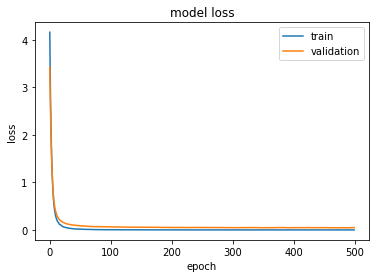

In [97]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.legend(['train', 'validation'])
plt.show()

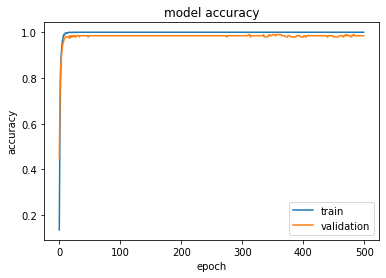

In [98]:
# plot variation of accuracy with epochs
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.legend(['train', 'validation'])
plt.show()

In [99]:
# #print(train_labels.unique()[:4])
# submission = pd.DataFrame(predictions, columns = train_labels.unique())
# submission['id']=test_data_id
# submission.reset_index(drop=True, inplace=True)
# submission.head()
# submission.to_csv('submission.csv',index=False)

In [72]:
X_test_id = test['id']
X_test = test.drop(['id'], axis=1).values
X_test

array([[0.019531, 0.009766, 0.078125, ..., 0.      , 0.003906, 0.053711],
       [0.007812, 0.005859, 0.064453, ..., 0.000977, 0.037109, 0.044922],
       [0.      , 0.      , 0.001953, ..., 0.015625, 0.      , 0.      ],
       ...,
       [0.017578, 0.029297, 0.015625, ..., 0.      , 0.042969, 0.006836],
       [0.013672, 0.009766, 0.060547, ..., 0.      , 0.011719, 0.018555],
       [0.      , 0.11719 , 0.      , ..., 0.015625, 0.      , 0.017578]])

In [73]:
X_test_id.head()

0     4
1     7
2     9
3    12
4    13
Name: id, dtype: int64

In [74]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.10738699, -0.48340807,  1.7859236 , ..., -0.52001246,
        -0.36877633,  1.50689382],
       [-0.48661074, -0.58401248,  1.25669405, ..., -0.49497401,
         2.03998637,  1.12066917],
       [-0.88257543, -0.73488047, -1.16261896, ..., -0.11957666,
        -0.65214311, -0.85338743],
       ...,
       [ 0.00839582,  0.01951098, -0.6333894 , ..., -0.52001246,
         2.46510908, -0.5529856 ],
       [-0.18958653, -0.48340807,  1.10549666, ..., -0.52001246,
         0.19802977, -0.03800476],
       [-0.88257543,  2.28273681, -1.23821765, ..., -0.11957666,
        -0.65214311, -0.08093814]])

In [75]:
y_train = train["species"]
y_train.head()

0              Acer_Opalus
1    Pterocarya_Stenoptera
2     Quercus_Hartwissiana
3          Tilia_Tomentosa
4       Quercus_Variabilis
Name: species, dtype: object

In [76]:
y_train = labels
y_train.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,Lithocarpus_Cleistocarpus,Lithocarpus_Edulis,Magnolia_Heptapeta,Magnolia_Salicifolia,Morus_Nigra,Olea_Europaea,Phildelphus,Populus_Adenopoda,Populus_Grandidentata,Populus_Nigra,Prunus_Avium,Prunus_X_Shmittii,Pterocarya_Stenoptera,Quercus_Afares,Quercus_Agrifolia,Quercus_Alnifolia,Quercus_Brantii,Quercus_Canariensis,Quercus_Castaneifolia,Quercus_Cerris,Quercus_Chrysolepis,Quercus_Coccifera,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#read data set
x_train = train.drop(['species', 'id'], axis=1).values
le = LabelEncoder().fit(train['species'])
y_train = le.transform(train['species'])

x_test = test.drop(['id'], axis=1).values

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


# Build 3 layer DNN with 1024, 512, 256 units respectively.
#classifier = tf.contrib.learn.DNNClassifier(hidden_units=[1024,512,256],
#n_classes=99)

#feature_columns = [tf.contrib.layers.real_valued_column("", dimension=1)]
classifier = learn.DNNClassifier(feature_columns=x_train.all(), hidden_units=[10, 20, 10], n_classes=2)

# Fit model.
classifier.fit(x=x_train, y=y_train, steps = 2000)

# Make prediction for test data
y = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)

# prepare csv for submission
test_ids = test.pop('id')
submission = pd.DataFrame(y_prob, index=test_ids, columns=le.classes_)
submission.to_csv('submission_log_reg.csv')

In [8]:
x_train = train.drop(['species', 'id'], axis=1).values
y_train = train['species']
x_test = test.drop(['id'], axis=1).values

In [80]:
x_train.shape

(990, 192)

In [83]:
x_test.shape

(594, 192)

In [84]:
labelEncoder = LabelEncoder()
train_labels_list = list(train["species"])
transformed_train_labels = labelEncoder.fit(train_labels_list).transform(train_labels_list)
train_labels_arr = to_categorical(transformed_train_labels)
train_labels_arr.shape

NameError: name 'LabelEncoder' is not defined

In [81]:
model = Sequential()
model.add(Dense(1024, input_dim=192, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(99, activation='sigmoid'))

In [82]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=10)

ValueError: Error when checking target: expected dense_22 to have shape (99,) but got array with shape (1,)